# Diagnostic

In [1]:
# packages
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import pickle
# from supportfunctions import PDESolver_2d, finiteDiff
from solver_2d import false_transient_one_iteration_python
from numba import njit
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import bicg
# from derivative import derivatives_2d, derivative_1d
import SolveLinSys
import time
# from solver_ode import solve_ode, solve_ode_one
# from solver_jump import approach_one, solve_smooth
# from solver import pde_solve
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
from multiprocessing import Pool
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.edgecolor"] = "w"
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["legend.frameon"] = False

In [2]:
e_list_1 = np.load("e_list_1.npy")
v_list_1 = np.load("v_list_1.npy")

In [3]:
v_list_1[0]

array([[5.87204138, 5.87110035, 5.87015906, ..., 5.82751558, 5.82656149,
        5.82560714],
       [5.8350774 , 5.83412544, 5.83317321, ..., 5.79003613, 5.78907105,
        5.78810569],
       [5.79835082, 5.79738787, 5.79642465, ..., 5.75279148, 5.75181535,
        5.75083894],
       ...,
       [3.08840246, 3.08615656, 3.08391025, ..., 2.98238209, 2.98011621,
        2.97784991],
       [3.06469238, 3.06242978, 3.06016676, ..., 2.95788475, 2.95560209,
        2.95331901],
       [3.0409886 , 3.03870918, 3.03642934, ..., 2.93339014, 2.93109066,
        2.92879075]])

In [4]:
e_list_2 = np.load("e_list_2.npy")
v_list_2 = np.load("v_list_2.npy")

In [5]:
e_list_5 = np.load("e_list_5.npy")
v_list_5 = np.load("v_list_5.npy")

In [6]:
e_list_10 = np.load("e_list_10.npy")
v_list_10 = np.load("v_list_10.npy")

In [7]:
e_list_20 = np.load("e_list_20.npy")
v_list_20 = np.load("v_list_20.npy")

In [8]:
e_list_30 = np.load("e_list_30.npy")
v_list_30 = np.load("v_list_30.npy")

In [9]:
import matplotlib.pyplot as plt

In [10]:
y1_step = .04
y1_grid = np.arange(0., 4., y1_step)

y2_step = .001
y2_grid = np.arange(0., .05, y2_step)

(y1_mat, y2_mat) = np.meshgrid(y1_grid, y2_grid, indexing = 'ij')
stateSpace = np.hstack([y1_mat.reshape(-1,1, order='F'), y2_mat.reshape(-1,1,order='F')])
hy1 = y1_grid[1] - y1_grid[0]
hy2 = y2_grid[1] - y2_grid[0]
n_y1 = len(y1_grid)
n_y2 = len(y2_grid)

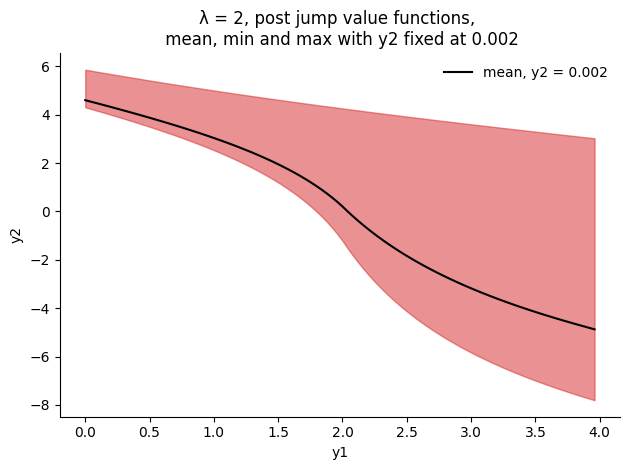

In [11]:
plt.plot(y1_grid, np.mean(v_list_2[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_2, axis=0)[:, 2], np.min(v_list_2, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 2, post jump value functions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()
plt.tight_layout()
# plt.savefig("v_2")
plt.show()

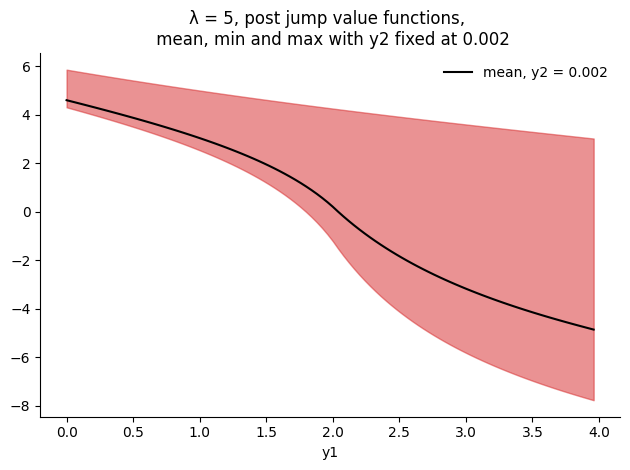

In [12]:
plt.plot(y1_grid, np.mean(v_list_5[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_5, axis=0)[:, 2], np.min(v_list_5, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 5, post jump value functions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
# plt.ylabel("y2")
plt.legend()
plt.tight_layout()
# plt.savefig("v_5")
plt.show()

In [13]:
plt.plot(y1_grid, np.mean(v_list_10[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_10, axis=0)[:, 2], np.min(v_list_10, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 10, post jump value functions,\n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("y2")
plt.tight_layout()

# plt.savefig("v_10")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

In [14]:
plt.plot(y1_grid, np.mean(v_list_2[:, :, 2], axis=0), label="λ = 2")
plt.plot(y1_grid, np.mean(v_list_5[:, :, 2], axis=0), label="λ = 5")
plt.plot(y1_grid, np.mean(v_list_10[:, :, 2], axis=0), label="λ = 10")
plt.legend()
plt.xlabel("y1")
plt.title("value functions,  y2 fixed at {}".format(y2_grid[2]))
plt.tight_layout()
# plt.savefig("vs")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

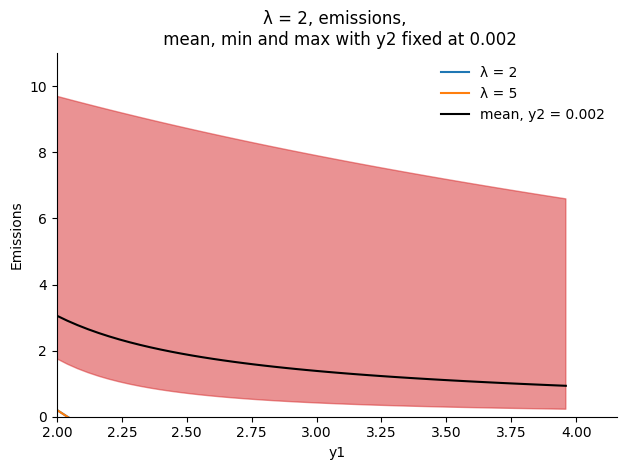

In [15]:
plt.plot(y1_grid, np.mean(e_list_2[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_2, axis=0)[:, 2], np.min(e_list_2, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 2, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0, 11)
# plt.savefig("e_2")
plt.show()

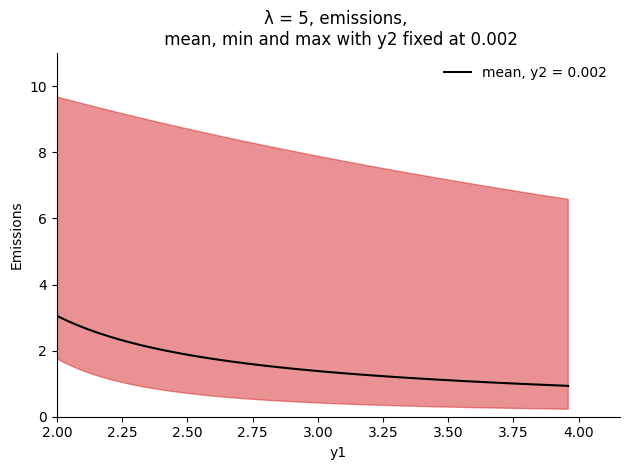

In [16]:
plt.plot(y1_grid, np.mean(e_list_5[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_5, axis=0)[:, 2], np.min(e_list_5, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 5, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0, 11)
# plt.savefig("e_5")
plt.show()

In [17]:
plt.plot(y1_grid, np.mean(e_list_10[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_10, axis=0)[:, 2], np.min(e_list_10, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 10, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0,15)
# plt.savefig("e_10")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

In [18]:
i_over_k = 0.09
α = 0.115
αₖ = - 0.043
σₖ = 0.0095
κ = 6.667
k0 = 85/α
C0 = (α - i_over_k)*k0

In [19]:
# simulate
def simulate_logkapital(invkap, αₖ,  σₖ, κ, k0, T=100, dt=1):
    periods = int(T/dt)
    Kt = np.zeros(periods)
    i = invkap
     # log capital
    Kt[0] = np.log(k0)
    k = np.log(k0)
    for t in range(periods-1):
        k +=   (αₖ + i - κ/2*i**2 - .5*σₖ**2)*dt
        Kt[t+1] = k
    return Kt

Kt = simulate_logkapital(i_over_k, αₖ, σₖ, κ,  k0, T=101)

In [20]:
def simulation(y1_grid, y2_grid, e_grid, λ, θ=1.86/1000., y1_0=1.1, y2_0=1.86/1000, T=100):
    e_fun = interpolate.interp2d(y1_grid, y2_grid, e_grid.T)
    Et = np.zeros(T+1)
    y1t = np.zeros(T+1)
    y2t = np.zeros(T+1)
    for i in range(T+1):
#         y2_0 = max(y2_0, 0)
#         y2_0 = min(y2_0, 0.05)
        Et[i] = e_fun(y1_0, y2_0)
        y1t[i] = y1_0
        y2t[i] = y2_0
        y2_0 = np.exp(-λ)*y2_0 + (1 - np.exp(-λ))*θ*Et[i] 
#         y2_0 = max(y2_0, 0)
        y1_0 = y1_0 + y2_0
    return Et, y1t, y2t

In [21]:
import pandas as pd

In [22]:
# parameters
δ = 0.01
η = 0.032
ξa = 0.01
θ_list = pd.read_csv("../data/model144.csv", header=None)[0].to_numpy()
θ_list = θ_list/1000
θ = np.mean(θ_list)
σy = 1.2*θ
# damage function
ȳ = 2
γ1 = 0.00017675
γ2 = 2*0.0022
γ3_list = np.linspace(0., 1./3, 20)
# y grid
# λ = np.log(2)/6

In [23]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump emissions")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 

plt.subplot(131)
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 5, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=5")
# plt.show()  

plt.subplot(133)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 10, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("es_post_jump")
plt.show()  

ValueError: x and y must have equal lengths for non rectangular grid

In [24]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump emissions")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 

plt.subplot(131)
plt.plot(γ3_list, et_list[i],  color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 5, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=5")
# plt.show()  

plt.subplot(133)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 10, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("es_post_jump")
plt.show()  

ValueError: x and y must have same first dimension, but have shapes (20,) and (101,)

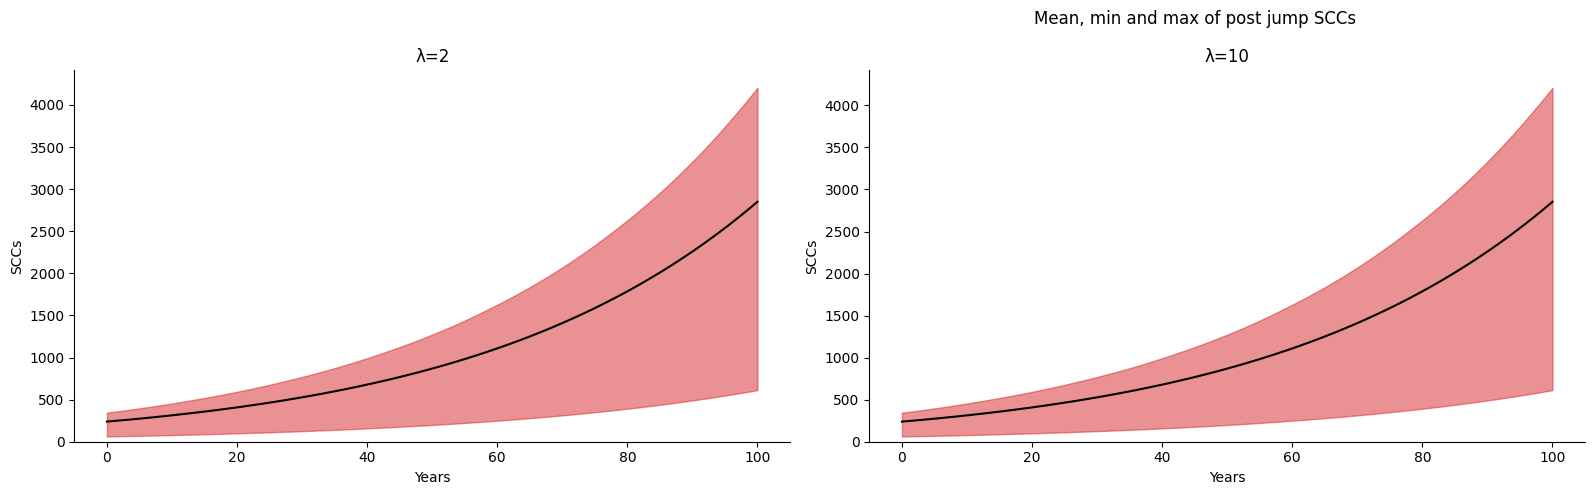

In [64]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump SCCs")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 


logN_list = np.zeros((len(γ3_list), T+1))
SCC_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
    SCC_list[i] = η * (α - i_over_k)*np.exp(Kt) / (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000
plt.subplot(131)
plt.plot(np.mean(SCC_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)

plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 2, y1_0=2, y2_0=np.mean(θ_list))
    
logN_list = np.zeros((len(γ3_list), T+1))
SCC_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
    SCC_list[i] = η * (α - i_over_k)*np.exp(Kt)/ (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000

plt.plot(np.mean(SCC_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=5")
# plt.show()  

# plt.subplot(133)
# T = 100
# et_list = np.zeros((len(γ3_list), T+1))
# y1t_list = np.zeros((len(γ3_list), T+1))
# y2t_list = np.zeros((len(γ3_list), T+1))
# for i in range(len(γ3_list)):
#     et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 2, y1_0=2, y2_0=np.mean(θ_list))
    
# logN_list = np.zeros((len(γ3_list), T+1))
# SCC_list = np.zeros((len(γ3_list), T+1))
# for i in range(len(γ3_list)):
#     logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
#     SCC_list[i] = η * (α - i_over_k)*np.exp(Kt) / (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000

# plt.plot(np.mean(SCC_list, axis=0), color="black")
# plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("scc_post_jump")
plt.show()  

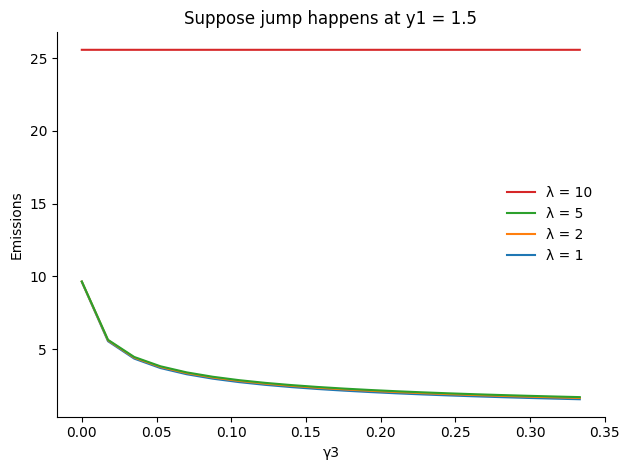

In [26]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

simul_10 = pickle.load(open("simul_10", "rb"))
loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_10[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.5")
plt.tight_layout()

# plt.savefig("emission_jump15_4")
plt.show()

In [27]:
# interpolation 
v_funs_2 = [interpolate.interp2d(y1_grid, y2_grid, v_list_2[i].T) for i in range(len(γ3_list))]
v_funs_5 = [interpolate.interp2d(y1_grid, y2_grid, v_list_5[i].T) for i in range(len(γ3_list))]
v_funs_1 = [interpolate.interp2d(y1_grid, y2_grid, v_list_1[i].T) for i in range(len(γ3_list))]

In [28]:
# interpolation 
e_funs_2 = [interpolate.interp2d(y1_grid, y2_grid, e_list_2[i].T) for i in range(len(γ3_list))]
e_funs_5 = [interpolate.interp2d(y1_grid, y2_grid, e_list_5[i].T) for i in range(len(γ3_list))]
e_funs_1 = [interpolate.interp2d(y1_grid, y2_grid, e_list_1[i].T) for i in range(len(γ3_list))]


[4.62301427 3.3361345  2.83170379 2.52013834 2.29782536 2.12672411
 1.98867028 1.87360774 1.77540661 1.69006509 1.61483144 1.5477347
 1.48730822 1.43245853 1.38231492 1.33620893 1.29360171 1.25402036
 1.2171154  1.18259491]
[4.61636504 3.33395664 2.83142921 2.52114875 2.29980656 2.12948654
 1.99208594 1.87758535 1.7798761  1.69497147 1.62013018 1.55338712
 1.49329062 1.43874257 1.38888425 1.34304151 1.30067566 1.26133091
 1.22464791 1.19033015]
[4.61239767 3.33264417 2.8312382  2.52171075 2.30093969 2.13108134
 1.99406812 1.87990155 1.78248658 1.69784462 1.62323966 1.55671179
 1.49681427 1.44244873 1.39276136 1.34707789 1.30485839 1.26565606
 1.22910879 1.19491432]


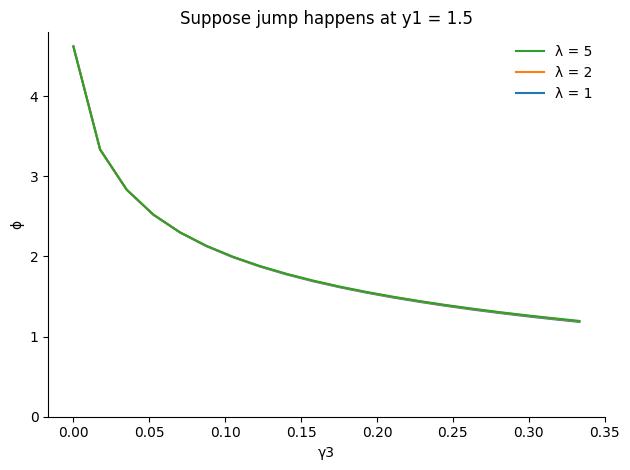

In [30]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_1[i](1.5, simul_1["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 1")
print(v_jump)
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_2[i](1.5, simul_2["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 2")
print(v_jump)
simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_5[i](1.5, simul_5["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 5")
print(v_jump)
# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
# v_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     v_jump[i] = v_funs_1[i](1.5, simul_5["y2t"][loc_y2])

# plt.plot(γ3_list, v_jump, label="λ = 5")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("ϕ")
plt.title("Suppose jump happens at y1 = 1.5")
# plt.xlim(0.15)
plt.ylim(0)
plt.tight_layout()

# plt.savefig("v_jump15")
plt.show()

[10.87768374  7.28330733  6.22459473  5.64933738  5.27180467  4.99858493
  4.78854687  4.6202783   4.48137792  4.3640838   4.26324092  4.17528193
  4.09763296  4.02841338  3.96616507  3.90978469  3.85839929  3.81127118
  3.76785248  3.72769053]
[10.84254296  7.2660792   6.21184539  5.63891827  5.26287631  4.99072005
  4.78148845  4.6138622   4.47548815  4.35863545  4.25817267  4.17054254
  4.09318719  4.02422279  3.96220921  3.90603808  3.85483882  3.80789211
  3.76463945  3.72462298]
[10.82149522  7.25574412  6.20419481  5.63266313  5.25751636  4.98599786
  4.77724947  4.6100084   4.47195054  4.35536245  4.25512695  4.16769442
  4.09051542  4.02170533  3.95983157  3.90378587  3.85269737  3.80585859
  3.76270597  3.72277649]


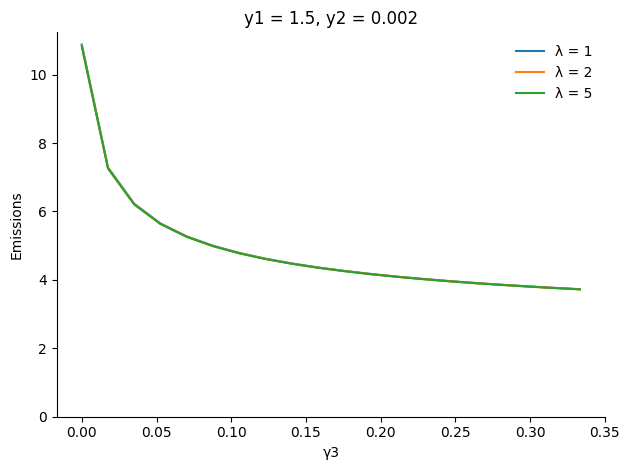

In [31]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_1[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 1")
print(e_jump)
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_2[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 2")
print(e_jump)
simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_5[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 5")
print(e_jump)
# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     e_jump[i] = e_funs_1[i](1.5, simul_5["y2t"][loc_y2])

# plt.plot(γ3_list, e_jump, label="λ = 5")

# handles, labels = ax.get_legend_handles_labels()
# # reverse the order
# ax.legend(handles[::-1], labels[::-1])
plt.legend()
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("y1 = 1.5, y2 = 0.002")
# plt.xlim(0.15)
plt.ylim(0)
# plt.xlim(0,0.05)
plt.tight_layout()

# plt.savefig("e_jump15")
plt.show()

In [32]:
γ3_list[1]

0.017543859649122806

In [33]:
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]
    
simul_2["y2t"][loc_y2]

0.005886035953279193

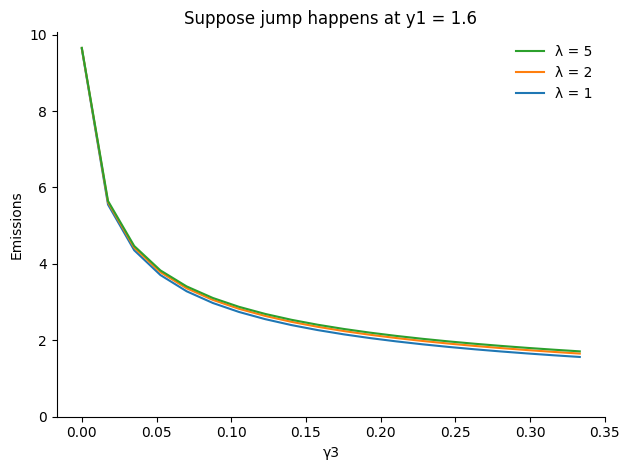

In [34]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.6).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
#     e_jump[i] = e_list_10[i, 50, loc_e]

# plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.6")
plt.ylim(0)
plt.tight_layout()

# plt.savefig("emission_jump16_4")
plt.show()

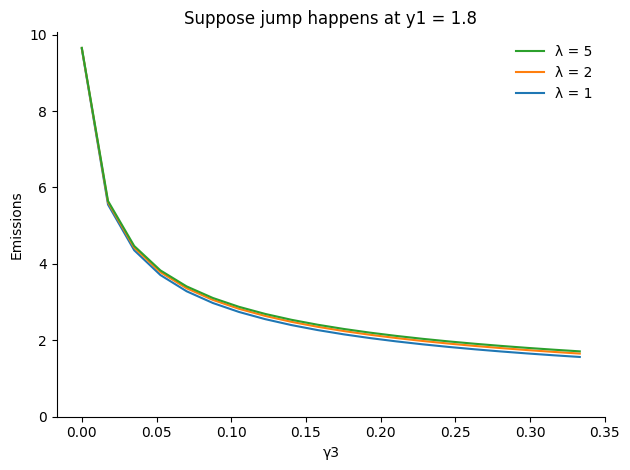

In [35]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.8).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
#     e_jump[i] = e_list_10[i, 50, loc_e]

# plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.8")
plt.ylim(0)
plt.tight_layout()

# plt.savefig("emission_jump16_4")
plt.show()

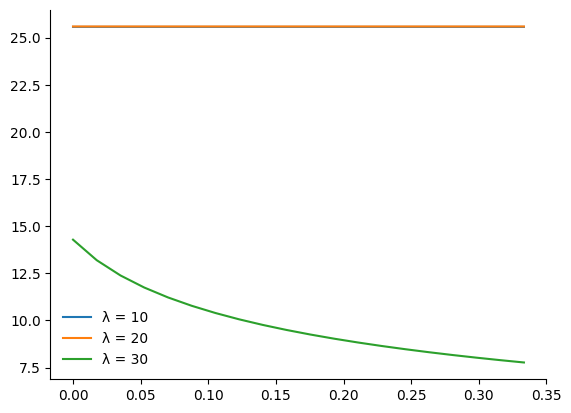

In [36]:
simul_10 = pickle.load(open("simul_10", "rb"))
loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_10[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 10")


simul_20 = pickle.load(open("simul_20", "rb"))
loc_y2 = np.abs(simul_20["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_20[i, 50, :] - simul_20["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_20[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 20")

simul_30 = pickle.load(open("simul_30", "rb"))
loc_y2 = np.abs(simul_30["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_30[i, 50, :] - simul_30["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_30[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 30")

plt.legend()
plt.show()

In [37]:
loc_y2, simul_10["y2t"][loc_y2], loc_e

(12, 0.026335690240440766, 49)

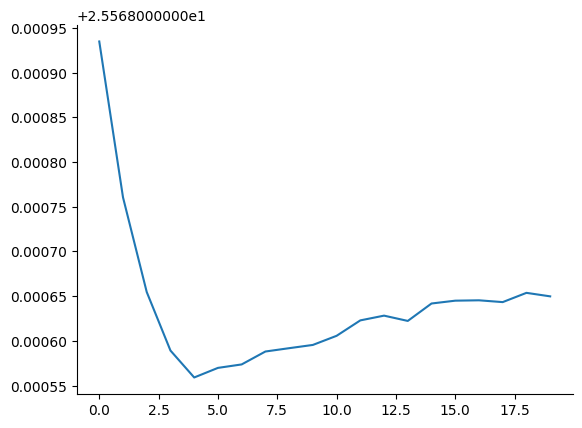

In [38]:
plt.plot(e_list_10[:, 50, 49])
plt.show()

In [61]:
simul_1 = pickle.load(open("simul_1", "rb"))
simul_2 = pickle.load(open("simul_2", "rb"))
simul_5 = pickle.load(open("simul_5", "rb"))

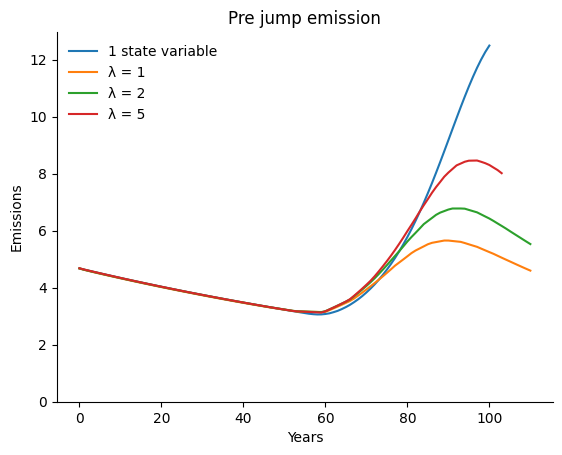

In [62]:
et_1state = np.load('et_1state_cal.npy')
plt.plot(et_1state, label="1 state variable")
plt.plot(simul_1["et"], label="λ = 1")
plt.plot(simul_2["et"], label="λ = 2")
plt.plot(simul_5["et"], label="λ = 5")
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("Pre jump emission")
plt.legend()
# plt.savefig("e_prejump_3")
plt.show()

In [46]:
et_1 = simul_1["et"]
et_2 = simul_2["et"]
et_5 = simul_5["et"]

In [47]:
et_1[:len(et_2)] > et_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [48]:
et_2[:len(et_5)] > et_5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [49]:
Kt = simulate_logkapital(i_over_k, αₖ, σₖ, κ,  k0, T=120 + 1)

In [50]:
lis = [1,2,5]
simuls = [simul_1, simul_2, simul_5]
logN = []
sccs = []
for i in range(len([1,2,5])):
    yt = simuls[i]["y1t"]
    et = simuls[i]["et"]
    logN_i = γ1 * yt + γ2/2 * yt**2
    scc_i = η * (α - i_over_k)*np.exp(Kt[:len(et)])/ (1 - η) / np.exp(logN_i) /et * 1000
    logN.append(logN_i)
    sccs.append(scc_i)

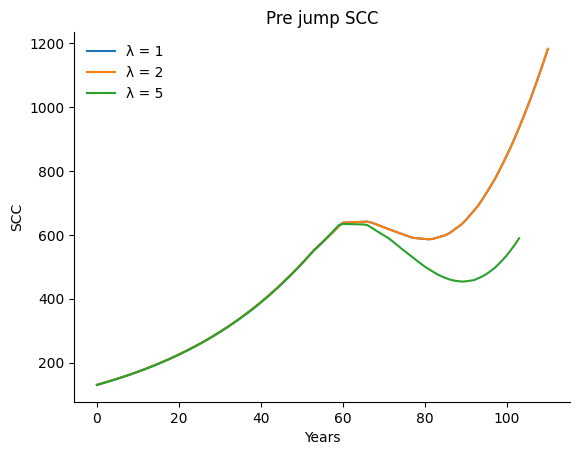

In [51]:
for i in range(3):
    plt.plot(sccs[i], label="λ = {}".format(lis[i]))
plt.legend()
plt.xlabel("Years")
plt.ylabel("SCC")
plt.title("Pre jump SCC")
# plt.savefig("scc_prejump")
plt.show()

In [52]:
sccs[1][:len(sccs[2])] < sccs[2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [53]:
sccs[0][:len(sccs[1])] < sccs[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [54]:
simul_1_old = pickle.load(open("simul_1_old", "rb"))
simul_2_old = pickle.load(open("simul_2_old", "rb"))
simul_5_old = pickle.load(open("simul_5_old", "rb"))

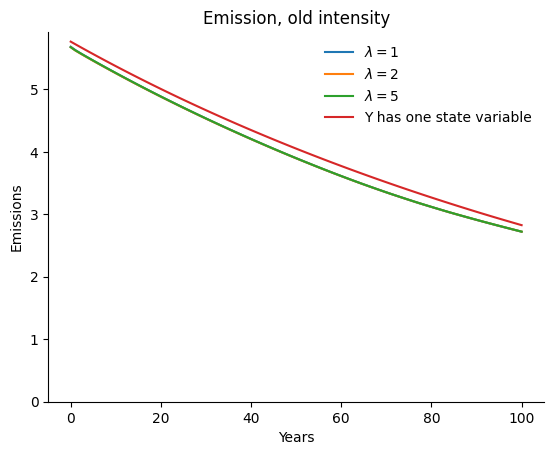

In [55]:
et = np.load("et_1state_old.npy")
simuls = [simul_1_old, simul_2_old, simul_5_old]
lambdas = [1,2,5]
for simul, lam in zip(simuls, lambdas):
    plt.plot(simul["et"], label=r"$λ = {}$".format(lam))
plt.plot(et, label="Y has one state variable")
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.legend()
plt.ylim(0)
plt.title("Emission, old intensity")
plt.savefig("ems_3_old")
plt.show()

In [56]:
# ξ
simuls = {}
simuls[5] = pickle.load(open('../simul_1_5.0', 'rb'))
simuls[0.1] = pickle.load(open('../simul_1_0.1', 'rb'))
simuls[1] = pickle.load(open('../simul_1_1.0', "rb"))

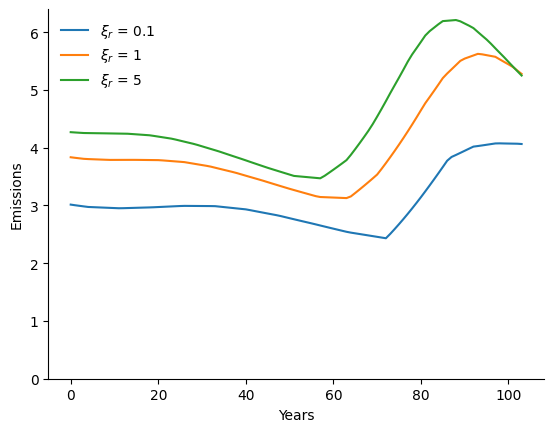

In [57]:
for i in [0.1, 1, 5]:
    plt.plot(simuls[i]['et'], label=r"$ξ_r$ = {}".format(i))
plt.ylim()
# plt.plot(simul_2['et'])
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.ylim(0)
plt.legend()
plt.show()

In [58]:
e_1 = np.load("ems_1.npy")
e_2 = np.load("ems_2.npy")
e_5 = np.load("ems_5.npy")

In [59]:
ems_1state = np.load("ems_1state_cal.npy")
# ems_2state = np.load("ems_2state.npy")

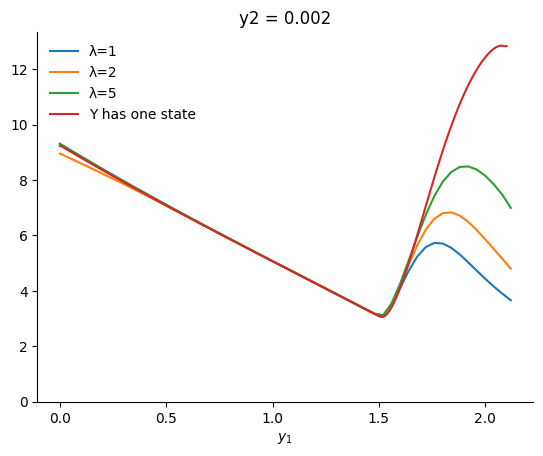

In [60]:
plt.plot(y1_grid[:len(e_1)],e_1[:,2], label="λ=1")
plt.plot(y1_grid[:len(e_1)],e_2[:,2], label="λ=2")
plt.plot(y1_grid[:len(e_1)],e_5[:,2], label="λ=5")
plt.plot(np.arange(0, 2.1 + 0.01, 0.01), ems_1state, label="Y has one state")
plt.ylim(0)
plt.title("y2 = {}".format(y2_grid[2]))
plt.xlabel("$y_1$")
plt.legend()
# plt.savefig("ems_y1")
plt.show()

In [187]:
e_18 = np.load("ems_1_1.8.npy")
e_19 = np.load("ems_1_1.9.npy")
e_195 = np.load("ems_1_1.95.npy")

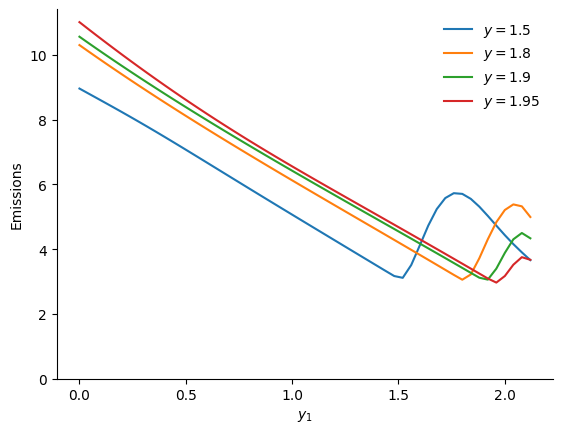

In [188]:
plt.plot(y1_grid[:len(e_1)], e_1[:,2], label=r"$y = 1.5$")
plt.plot(y1_grid[:len(e_18)], e_18[:,2], label=r"$y = 1.8$")
plt.plot(y1_grid[:len(e_19)], e_19[:,2], label=r"$y = 1.9$")
plt.plot(y1_grid[:len(e_19)], e_195[:,2], label=r"$y = 1.95$")
plt.legend()
plt.xlabel("$y_1$")
plt.ylabel("Emissions")
plt.ylim(0)
plt.savefig("ems_underline")
plt.show()

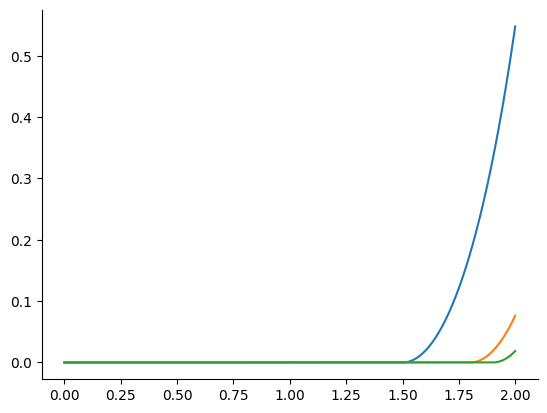

In [200]:
plt.plot(y1_grid, Intensity)
y_lower = 1.8
Intensity2 = r1 * (np.exp(r2 / 2 * (y1_grid - y_lower)**2) -
                  1) * (y1_grid >= y_lower)
plt.plot(y1_grid, Intensity2)
y_lower = 1.9
Intensity3 = r1 * (np.exp(r2 / 2 * (y1_grid - y_lower)**2) -
                  1) * (y1_grid >= y_lower)
plt.plot(y1_grid, Intensity3)
plt.show()

In [201]:
y1_grid_cap = np.arange(0., 2.1 + y1_step, y1_step)

In [207]:
dis1 = np.load("inten_multi_1.npy")
dis2 = np.load("inten_multi_2.npy")
dis3 = np.load("inten_multi_5.npy")

In [211]:
dis1 - dis2, dis3>=0

(array([[ 1.02824133e+01,  8.86663365e+00,  7.43021661e+00, ...,
         -8.43209071e+01, -8.70950772e+01, -8.99081843e+01],
        [ 8.45455222e+00,  7.14656098e+00,  5.81912429e+00, ...,
         -7.88839724e+01, -8.14432525e+01, -8.40386317e+01],
        [ 6.92625055e+00,  5.71901742e+00,  4.49405177e+00, ...,
         -7.36010504e+01, -7.59588092e+01, -7.83495911e+01],
        ...,
        [ 1.85189144e-02,  1.63150122e-02,  1.40856541e-02, ...,
         -1.22739247e-01, -1.26710442e-01, -1.30728755e-01],
        [ 1.51618692e-02,  1.31631954e-02,  1.11430419e-02, ...,
         -1.11247373e-01, -1.14765109e-01, -1.18321385e-01],
        [ 1.21121965e-02,  1.03124002e-02,  8.49453808e-03, ...,
         -1.00271856e-01, -1.03367480e-01, -1.06494873e-01]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, Fal

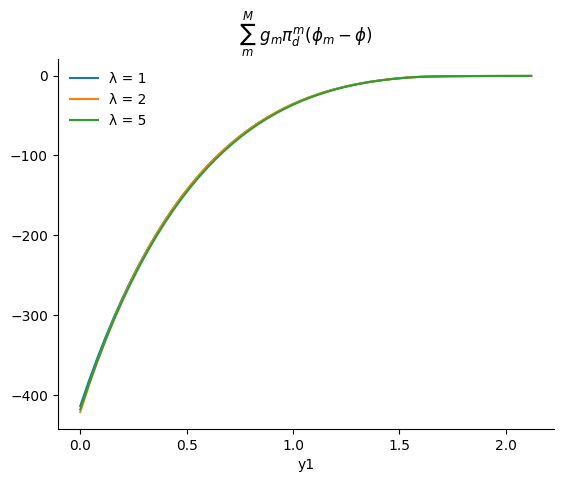

In [229]:
plt.plot(y1_grid_cap, dis1[:,2], label="λ = 1")
plt.plot(y1_grid_cap, dis2[:,2], label="λ = 2")
plt.plot(y1_grid_cap, dis3[:,2], label="λ = 5")
plt.xlabel("y1")
plt.title(r"$\sum_m^M\/ \/g_m \pi_d^m (\phi_m - \phi)$")
plt.legend()
plt.savefig("multiplier")
plt.show()

In [212]:
r1 = 1.5
r2 = 2.5
y_lower = 1.5
Intensity = r1 * (np.exp(r2 / 2 * (y1_grid_cap - y_lower)**2) -
                  1) * (y1_grid_cap >= y_lower)

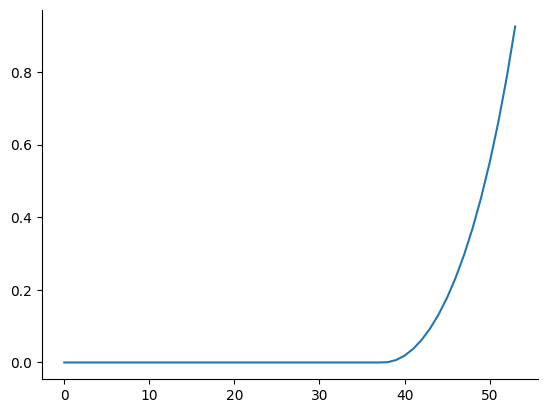

In [218]:
plt.plot(Intensity)
plt.show()

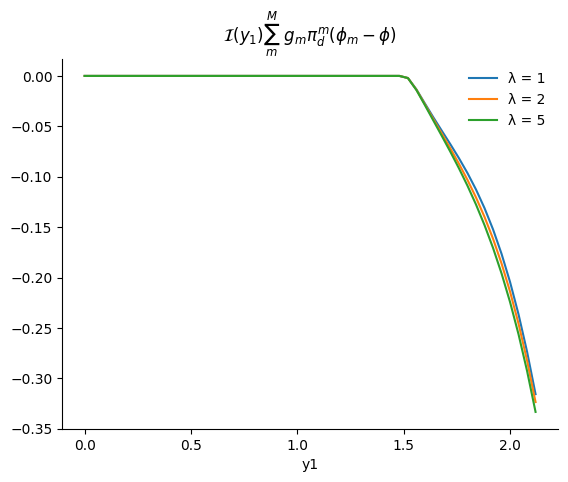

In [230]:
plt.plot(y1_grid_cap, Intensity * dis1[:,2], label="λ = 1")
plt.plot(y1_grid_cap, Intensity * dis2[:,2], label="λ = 2")
plt.plot(y1_grid_cap, Intensity * dis3[:,2], label="λ = 5")
plt.legend()
plt.xlabel("y1")
plt.title(r"$\mathcal{I}(y_1) \sum_m^M\/ \/g_m \pi_d^m (\phi_m - \phi)$")
plt.savefig("multiplierxI")
plt.show()